In [65]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dataset utils
import art_stats_utils

In [66]:
# Read data
df = pd.read_csv('../data/moma/Artworks.csv')

# Prepare data
df = art_stats_utils.prepare_dataset(df)

# Identify relevant columns
cols = [
    'Title', 'Artist', 'BeginDate', 'EndDate', 'Date', 
    'DateAcquired', 'year_acquired', 'date_stripped', 
    'begun_year', 'completed_year', 'birth_year', 
    'death_year', 'artwork_age', 'living', 'artist_age', 
    'years_posthumous'
]

df[cols].head()

,Title,Artist,BeginDate,EndDate,Date,DateAcquired,year_acquired,date_stripped,begun_year,completed_year,birth_year,death_year,artwork_age,living,artist_age,years_posthumous
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,(1841),(1918),1896,1996-04-09,1996.0,1896,1896.0,1896.0,1841.0,1918.0,100.0,0,NaN,78.0
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,(1944),(0),1987,1995-01-17,1995.0,1987,1987.0,1987.0,1944.0,0.0,8.0,1,51.0,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,(1876),(1957),1903,1997-01-15,1997.0,1903,1903.0,1903.0,1876.0,1957.0,94.0,0,NaN,40.0
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,(1944),(0),1980,1995-01-17,1995.0,1980,1980.0,1980.0,1944.0,0.0,15.0,1,51.0,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,(1876),(1957),1903,1997-01-15,1997.0,1903,1903.0,1903.0,1876.0,1957.0,94.0,0,NaN,40.0


In [67]:
# Filter for paintings with valid width
paintings = df[(df['Classification'] == 'Painting') & (df['Width (cm)'] > 0)]
paintings.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,year_acquired,date_stripped,begun_year,completed_year,birth_year,death_year,artwork_age,living,artist_age,years_posthumous
32097,"Rope and People, I",Joan Miró,4016,"(Spanish, 1893–1983)",(Spanish),(1893),(1983),Male,"Barcelona, March 27, 1935","Oil on cardboard mounted on wood, with coil of...",...,1936.0,1935,1935.0,1935.0,1893.0,1983.0,1.0,1,43.0,NaN
33171,Fire in the Evening,Paul Klee,3130,"(German, born Switzerland. 1879–1940)",(German),(1879),(1940),Male,1929,Oil on cardboard,...,1970.0,1929,1929.0,1929.0,1879.0,1940.0,41.0,0,NaN,30.0
33428,Portrait of an Equilibrist,Paul Klee,3130,"(German, born Switzerland. 1879–1940)",(German),(1879),(1940),Male,1927,Oil and collage on cardboard over wood with pa...,...,1966.0,1927,1927.0,1927.0,1879.0,1940.0,39.0,0,NaN,26.0
34488,Guitar,Pablo Picasso,4609,"(Spanish, 1881–1973)",(Spanish),(1881),(1973),Male,"Paris, early 1919","Oil, charcoal and pinned paper on canvas",...,1955.0,1919,1919.0,1919.0,1881.0,1973.0,36.0,1,74.0,NaN
35406,Grandmother,Arthur Dove,1602,"(American, 1880–1946)",(American),(1880),(1946),Male,1925,"Shingles, needlepoint, page from Concordance, ...",...,1939.0,1925,1925.0,1925.0,1880.0,1946.0,14.0,1,59.0,NaN


In [68]:
# Establish palette
pink = '#FE5F55'
blue = '#208AAE'
green = '#18A999'

colors = [pink, blue, green]

mypalette = sns.set_palette(sns.color_palette(colors))
sns.color_palette(colors)

[(0.996078431372549, 0.37254901960784315, 0.3333333333333333),
 (0.12549019607843137, 0.5411764705882353, 0.6823529411764706),
 (0.09411764705882353, 0.6627450980392157, 0.6)]

# Range
Let's take a look at painting widths.

In [69]:
# Compute max, min, and range
max_width = paintings['Width (cm)'].max()
min_width = paintings['Width (cm)'].min()
width_range = max_width - min_width
cm_to_ft = 0.0328084

# Print results
print("Max. painting width: {:,.2f} cm / {:,.2f} ft".format(max_width, max_width * cm_to_ft))
print("Min. painting width: {:,.2f} cm / {:,.2f} ft".format(min_width, min_width * cm_to_ft))
print("Min. painting width: {:,.2f} cm / {:,.2f} ft".format(width_range, width_range * cm_to_ft))

Max. painting width: 4,663.45 cm / 153.00 ft
Min. painting width: 4.10 cm / 0.13 ft
Min. painting width: 4,659.35 cm / 152.87 ft


So we can say that MoMA's paintings range between about 4cm in width to nearly 46 meters! At one extreme is [Barnett Newman's *The Wild* (1950)](https://www.moma.org/collection/works/80574), a vertical line of a painting. And at the other is [Jennifer Bartlett's *Rhapsody* (1975-76)](https://www.moma.org/collection/works/100190), a huge painting installation that's made up of 987 one-foot-square panels.

But does this really tell us much? Sure, it gives us the extremes, within which the widths of 100% of MoMA's painting collection are contained. But it doesn't tell us how most of the widths are dispersed. In other words, maybe Newman and Bartlett's works are outliers, meaning that their widths are substantially different from the widths of the bulk of the paintings in MoMA's collection.

# Interquartile Range
A better option would be to look at the interquartile range--that is, the difference between the 75th and 25th percentiles. This gives us the range of the central 50% of the distribution. And because outliers, by definition, 
exist not at the center but at extremes, the interquartile range has the wonderful distiction of being invulnerable to them. It is a metric, we could say, that is *robust*.

So let's have a look.

In [70]:
# Compute 1st and 3rd quartiles
q1 = paintings['Width (cm)'].quantile(.25)
q3 = paintings['Width (cm)'].quantile(.75)
iqr = q3 - q1

# Print results
print("25th percentile (1st quantile): {:,.2f} cm / {:,.2f} ft".format(q1, q1 * cm_to_ft))
print("75th percentile (3st quantile): {:,.2f} cm / {:,.2f} ft".format(q3, q3 * cm_to_ft))
print("Interquartile Range (IQR)): {:,.2f} cm / {:,.2f} ft".format(iqr, iqr * cm_to_ft))

25th percentile (1st quantile): 60.15 cm / 1.97 ft
75th percentile (3st quantile): 167.66 cm / 5.50 ft
Interquartile Range (IQR)): 107.50 cm / 3.53 ft


This looks much more reasonable! Now we can say that the middle 50% of paintings vary between about 2 and 5.5 feet in width and thus have an interquartile range of about 3.5 feet.

If we look at a historgram, we can see how this looks visually.

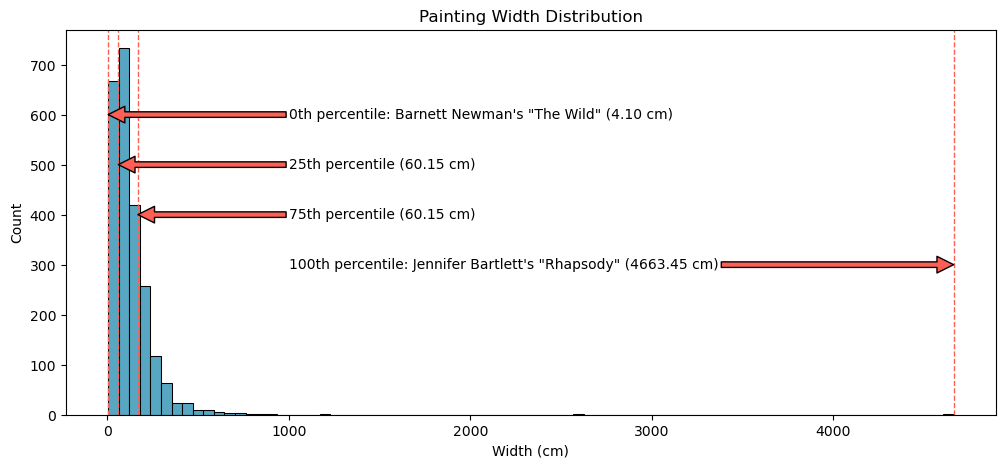

In [73]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.histplot(
    data=paintings,
    x='Width (cm)',
    bins=80,
    ax=ax,
    color=blue
)

ax.axvline(min_width, color=pink, ls='--', lw=1)
ax.annotate(
    '0th percentile: Barnett Newman\'s "The Wild" ({:.2f} cm)'.format(min_width), xy=(min_width, 600), xycoords='data', xytext=(1000, 600), 
    textcoords='data', arrowprops=dict(facecolor=pink, shrink=0),
    horizontalalignment='left', verticalalignment='center'
)

ax.axvline(q1, color=pink, ls='--', lw=1)
ax.annotate(
    '25th percentile ({:.2f} cm)'.format(q1), xy=(q1, 500), xycoords='data', xytext=(1000, 500), 
    textcoords='data', arrowprops=dict(facecolor=pink, shrink=0),
    horizontalalignment='left', verticalalignment='center'
)

ax.axvline(q3, color=pink, ls='--', lw=1)
ax.annotate(
    '75th percentile ({:.2f} cm)'.format(q1), xy=(q3, 400), xycoords='data', xytext=(1000, 400), 
    textcoords='data', arrowprops=dict(facecolor=pink, shrink=0),
    horizontalalignment='left', verticalalignment='center'
)

ax.axvline(max_width, color=pink, ls='--', lw=1)
ax.annotate(
    '100th percentile: Jennifer Bartlett\'s "Rhapsody" ({:.2f} cm)'.format(max_width), xy=(max_width, 300), xycoords='data', xytext=(1000, 300), 
    textcoords='data', arrowprops=dict(facecolor=pink, shrink=0),
    horizontalalignment='left', verticalalignment='center'
)

ax.set_title('Painting Width Distribution');

This chart makes it painfully clear just how misleading the original range calculation was, since the vast majority of paintings appear to be less than 500 cm (which makes sense, since 5 m is HUGE as it is!). In fact, this distribution is so positively skewed that the entire IQR, well, it looks like Newman's *The Wild*, it's so thin. This makes it clear that the interquartile range is vastly superior to the full range when it comes to providing some sense of how varied the observations are.

Another way of quickly visualizing variability like this is with a boxplot.

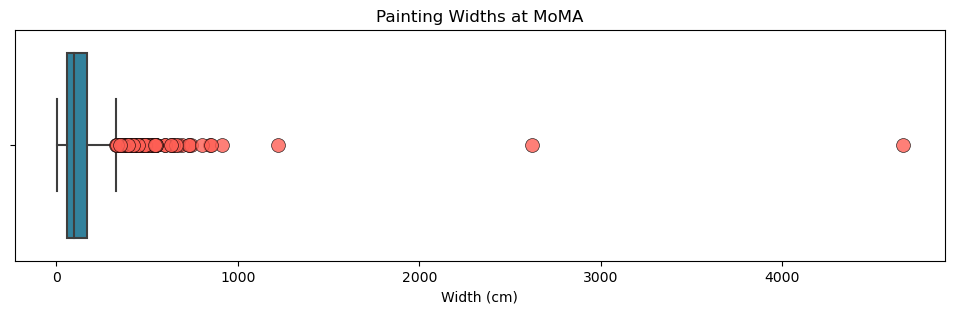

In [81]:
fig, ax = plt.subplots(figsize=(12, 3))

# Style fliers
flierprops = dict(
    marker='o', markerfacecolor=pink, markersize=10,  
    markeredgecolor='black', markeredgewidth=.5, alpha=.8
)

sns.boxplot(
    data=paintings,
    x='Width (cm)',
    ax=ax,
    color=blue,
    flierprops=flierprops
)

ax.set_title('Painting Widths at MoMA');

It takes a little getting used to if you haven't looked at one of these before. The thin blue shaded are represents the interquartile range, and the vertical line in the middle is the median (50th percentile) values. The bars sticking out on either side are called whiskers, which by convention extend past the 25th and 75th percentiles by 1.5 x the IQR (in this case about 161.3 cm). All those black diamonds beyond the right whisker? Those are outliers. We can see Bartlett's *Rhapsody* clearly at the right, and then [James Rosenquist's behemoth *F-111* (1964-65)](https://www.moma.org/collection/works/79805) after that.

Most of the time it's best to let outliers be outliers and ignore them if what we're interested in is getting a sense of a distribution's central tendency and variability, in which case we could do this:

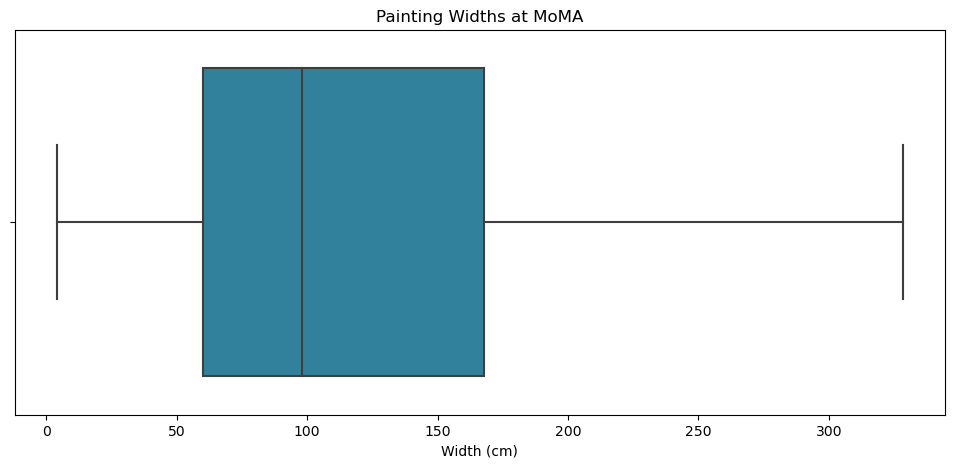

In [82]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.boxplot(
    data=paintings,
    x='Width (cm)',
    showfliers=False,
    ax=ax,
    color=blue
)

ax.set_title('Painting Widths at MoMA');

That right there gives us a damn good picture of MoMA's painting collection when it comes to width.

# Standard Deviation
The last foundational measure of variability is standard deviation, which sounds complicated but is just the average (i.e., standard) difference (i.e., deviation) of each observation from the mean. In other words, if we have a distribution with a mean of 100 and standard deviation of 5, we could say that, on average, the observations are +/- 5 from the mean.

Like the mean, standard deviation is *not* robust to outliers, since an outlier is very, very far from the mean and will bias the standard deviation in that direction.

In [64]:
mean_width = paintings['Width (cm)'].mean()
std_width = paintings['Width (cm)'].std()

print("Mean width: {:,.2f} cm / {:,.2f} ft".format(mean_width, mean_width * cm_to_ft))
print("Standard Deviation: {:,.2f} cm / {:,.2f} ft".format(std_width, std_width * cm_to_ft))

Mean width: 130.94 cm / 4.30 ft
Standard Deviation: 150.58 cm / 4.94 ft


To wrap this in english, we'd say that the mean painting width if 4.3 feet with a standar deviation of almost 5 feet, meaning that, on average, paintings are 4.3 ft. +/- 5 ft.

Let's compare that to our robust measures--median and IQR.

In [63]:
median_width = paintings['Width (cm)'].median()

print("Median width: {:,.2f} cm / {:,.2f} ft".format(median_width, median_width * cm_to_ft))
print("IQR: {:,.2f} cm / {:,.2f} ft".format(iqr, iqr * cm_to_ft))

Median width: 98.05 cm / 3.22 ft
IQR: 107.50 cm / 3.53 ft


We can definitely see how Bartlett's and Rosenquist's (and others') gargantuan works are biasing the mean and standard deviation in the positive direction. These measures are suggesting that what's "typical" at MoMA are bigger and more varied that what's actually true.

The advantage of mean and standard deviation is that they take into account the entire spectrum of observations, which, as we've seen, is not the case with median and interquartile range. If a distribution was more symmetrical, the former metrics would thus provide a more accurate and comprehensive estimation.

As one final example, let's revisit the more symmetrical distribution of painter's ages at the time of acquisition (for painters still living at that event).

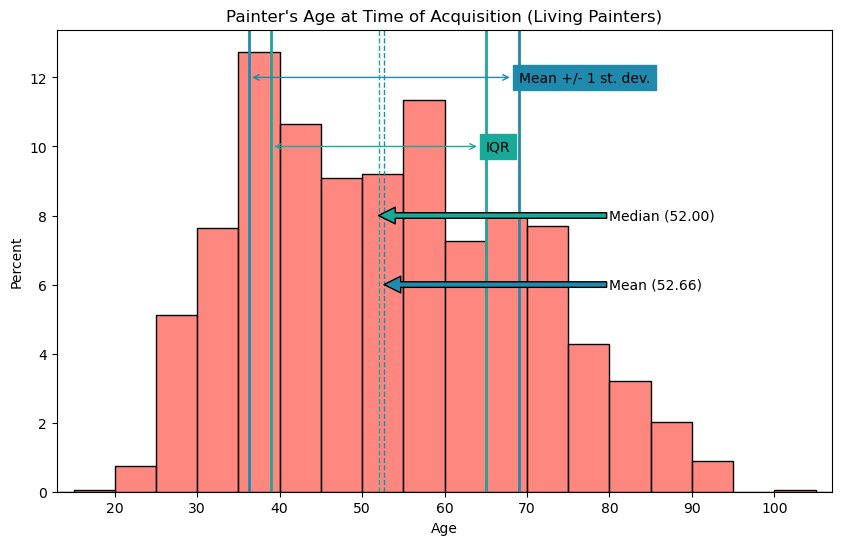

In [116]:
# Plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(
    data=paintings,
    x='artist_age',
    color=pink,
    ax=ax,
    binwidth=5,
    binrange=(10, 110),
    stat='percent',
)

# Axis labels
ax.set_title('Painter\'s Age at Time of Acquisition (Living Painters)')
ax.set_xlabel('Age')
ax.set_xticks(range(0, 130, 10))
ax.set_xlim(13, 107)

# Mean line and annotation
mean = paintings['artist_age'].mean()
std = paintings['artist_age'].std()

ax.axvline(mean, color=blue, ls='--', lw=1)
ax.annotate(
    'Mean ({:.2f})'.format(mean), xy=(mean, 6), xycoords='data', xytext=(80, 6), 
    textcoords='data', arrowprops=dict(facecolor=blue, shrink=0),
    horizontalalignment='left', verticalalignment='center'
)

ax.axvline(mean + std, color=blue, ls='-', lw=2)
ax.axvline(mean - std, color=blue, ls='-', lw=2)
ax.annotate(
    'Mean +/- 1 st. dev.', xy=(mean - std, 12), xycoords='data', xytext=(mean + std, 12), 
    textcoords='data', arrowprops=dict(edgecolor=blue, arrowstyle='<->'),
    horizontalalignment='left', verticalalignment='center', backgroundcolor=blue
)

# Median line and annotation
median = paintings['artist_age'].median()
q1, q3 = paintings['artist_age'].quantile([.25, .75])

ax.axvline(median, color=green, ls='--', lw=1)
ax.annotate(
    'Median ({:.2f})'.format(median), xy=(median, 8), xycoords='data', xytext=(80, 8), 
    textcoords='data', arrowprops=dict(facecolor=green, shrink=0),
    horizontalalignment='left', verticalalignment='center'
)

ax.axvline(q1, color=green, ls='-', lw=2)
ax.axvline(q3, color=green, ls='-', lw=2)
ax.annotate(
    'IQR', xy=(q1, 10), xycoords='data', xytext=(q3, 10), 
    textcoords='data', arrowprops=dict(edgecolor=green, arrowstyle='<->'),
    horizontalalignment='left', verticalalignment='center', backgroundcolor=green
);

#plt.savefig(fname='???.png', dpi=150, bbox_inches='tight');

Given that this distribution is much more symmetrical, my feeling is that the mean (rather than median) would offer a more accurate representation of its central tendency as would the standard deviation (rather than IQR) for representing its variability.